<a href="https://colab.research.google.com/github/KPARMAR0108/Daily-Practice/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [9]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation
1.Positive Correlation
2.Negative Correlation

In [11]:
correlation=gold_data.corr()

<Axes: >

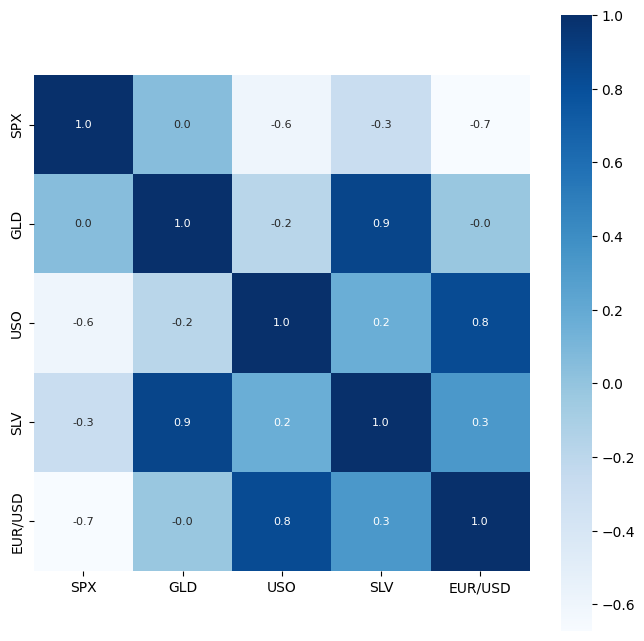

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [15]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [20]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [21]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [27]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100)

In [28]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [29]:
test_data_prediction=regressor.predict(X_test)

In [30]:
print(test_data_prediction)

[168.94410003  82.40959968 116.17909977 127.64920064 120.62650106
 154.69069746 150.84029843 126.17370061 117.56169907 126.21409982
 116.91060126 172.02940098 141.82189809 167.81609859 115.06390017
 117.58790028 138.99050309 170.10370095 159.96770259 159.90609899
 155.06950039 125.24710024 176.3493998  157.3460033  125.06970048
  93.91649974  77.75559998 120.53209977 118.99719889 167.59019926
  88.24630024 125.07600004  91.0886009  117.78180021 121.09409902
 136.42530111 115.44810125 115.53430058 147.34809905 107.46560114
 104.47760235  87.25269782 126.35880069 117.60510042 153.44429917
 119.6173998  108.50469973 107.98289785  93.23180076 127.12709807
  74.94850044 113.68549921 121.29910033 111.0449994  118.75899883
 120.81519946 159.03880072 166.85400116 146.93369688  85.79669861
  94.41140035  86.7519988   90.77320006 119.12370088 126.48120051
 127.49900044 169.61589993 122.38739895 117.36659922  98.53009999
 168.71500108 143.05659843 132.21990276 121.05900202 121.59699941
 119.64210

In [31]:
#R-squared
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9894089944420318


In [32]:
Y_test=list(Y_test)

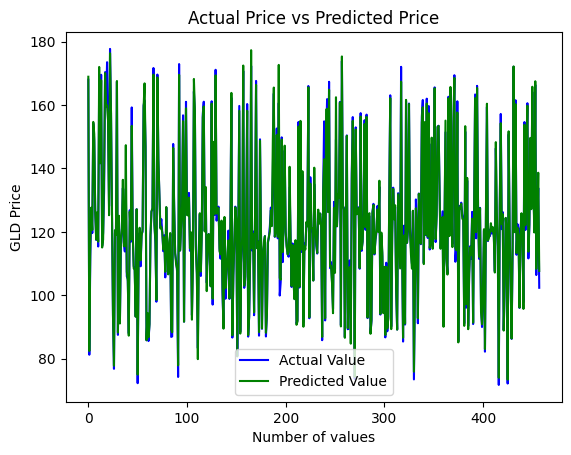

In [35]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()